# linear regression

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("new_insurance_data.csv")

In [3]:
#whole dataframe
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [4]:
#dataframe details info(datatypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [5]:
#null value
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [6]:
col=df.columns

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [8]:
for col_name in col:
    if df[col_name].dtypes=='object':
        df[col_name]=df[col_name].fillna(df[col_name].mode()[0])
    else:
        df[col_name]=df[col_name].fillna(df[col_name].mean())

In [9]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

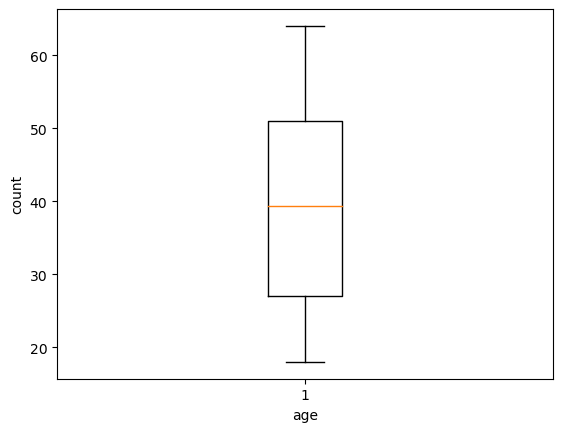

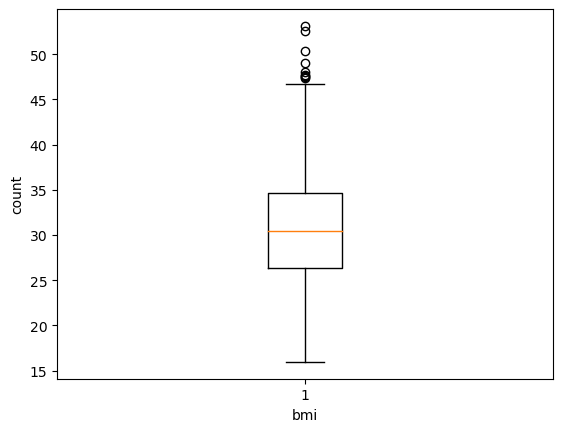

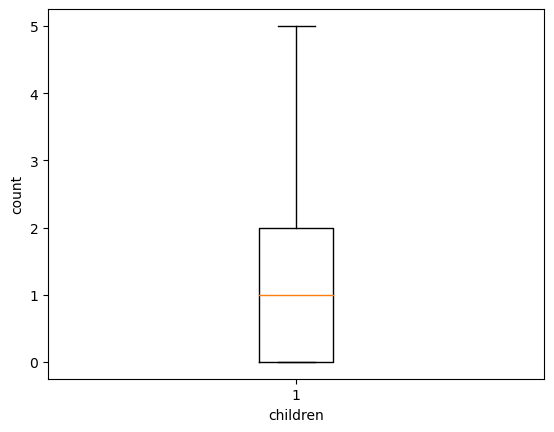

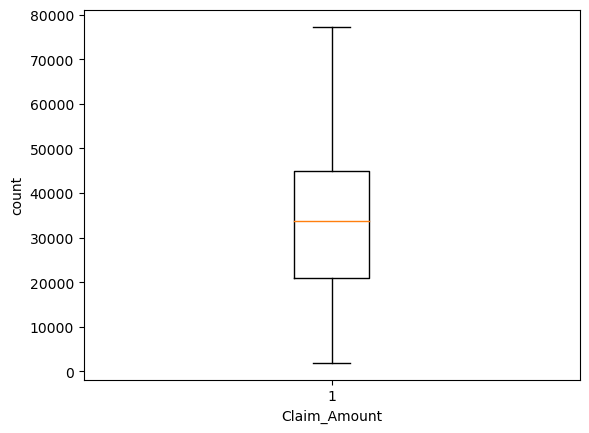

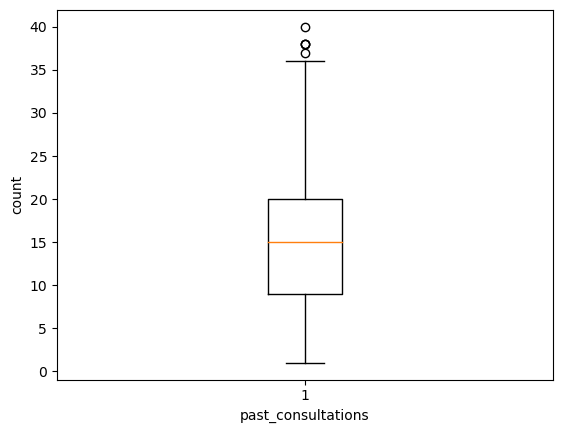

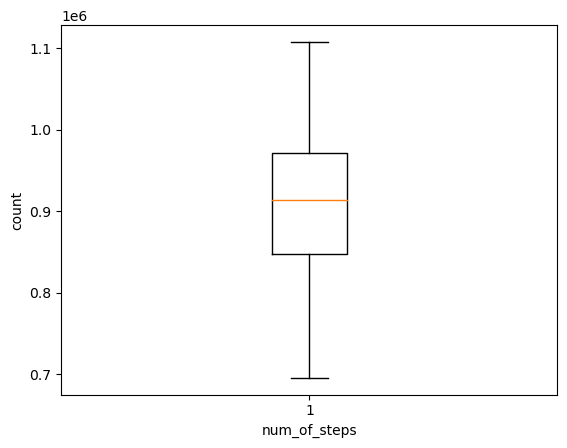

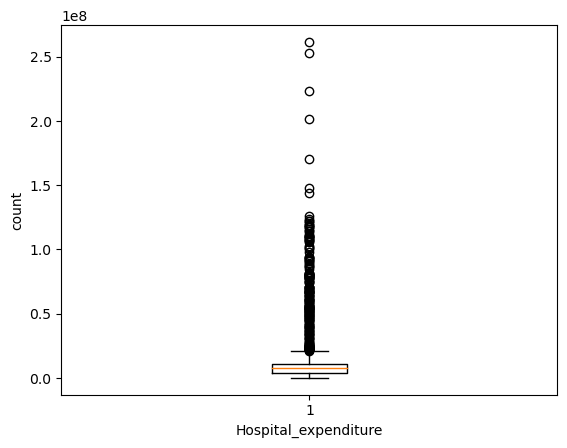

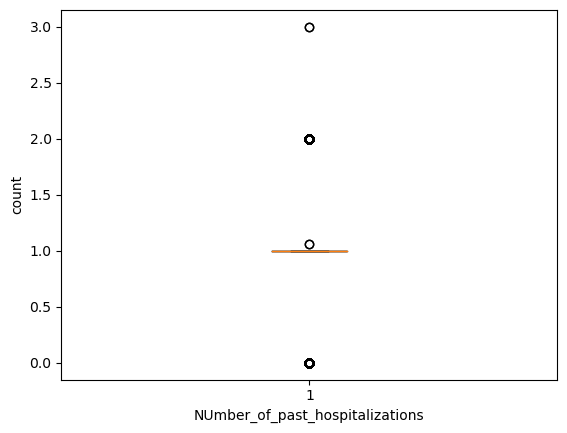

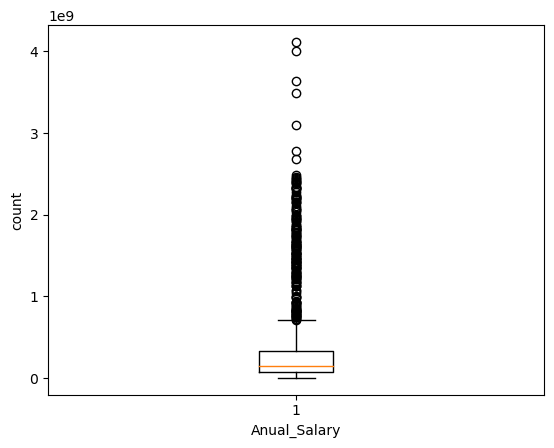

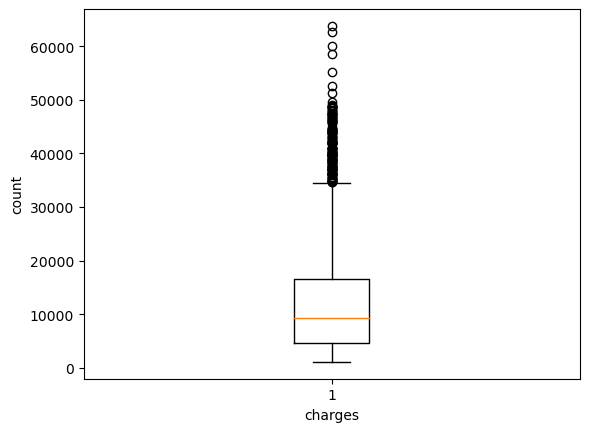

In [14]:
for col_name in col:
    if(df[col_name].dtype!='object'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [15]:
out_cols=["past_consultations", "Anual_Salary", "Hospital_expenditure", "charges", "bmi"]

In [16]:
out_cols

['past_consultations',
 'Anual_Salary',
 'Hospital_expenditure',
 'charges',
 'bmi']

In [17]:
for i in out_cols:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    df=df[(df[i]>=LL) & (df[i]<=UL)]
    

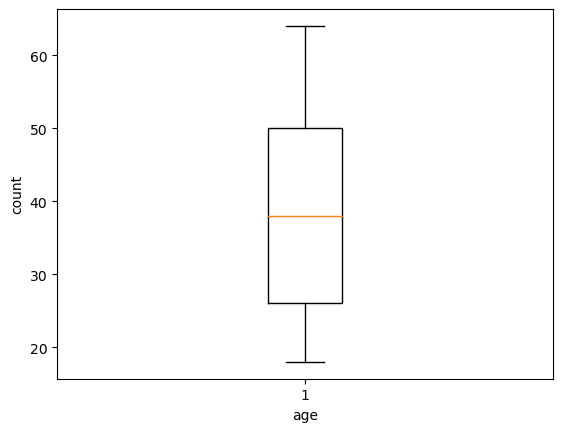

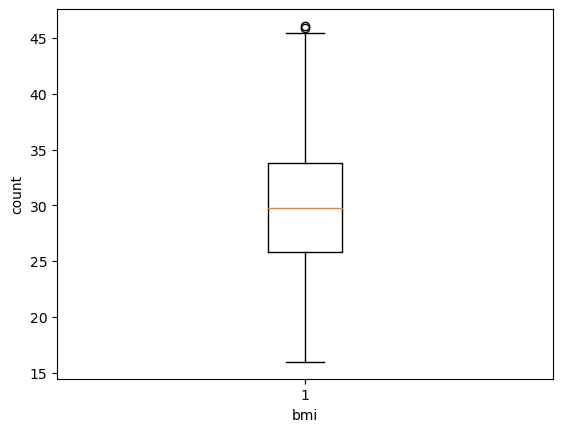

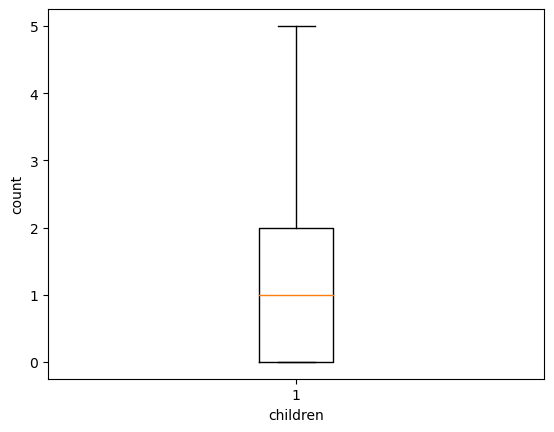

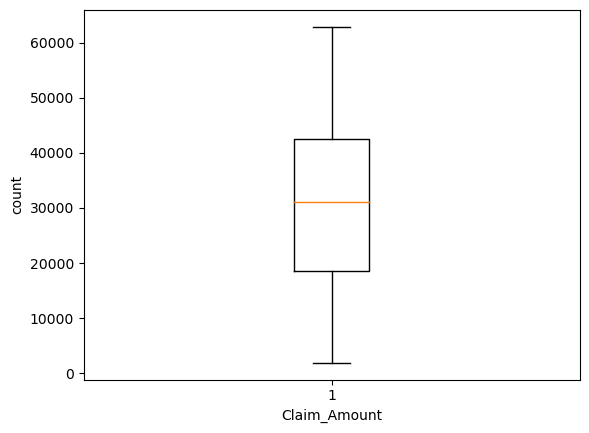

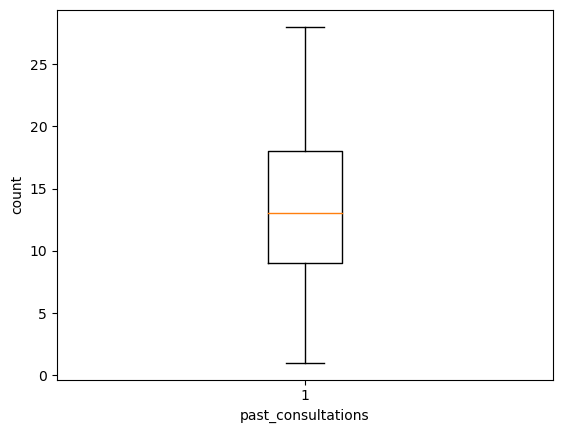

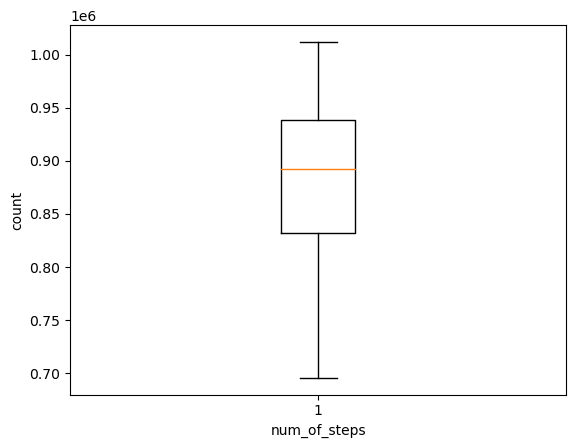

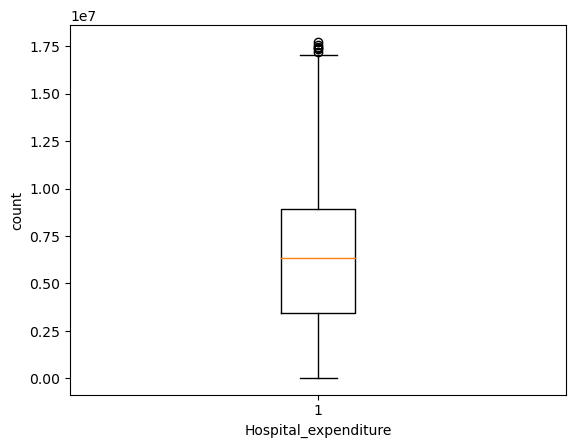

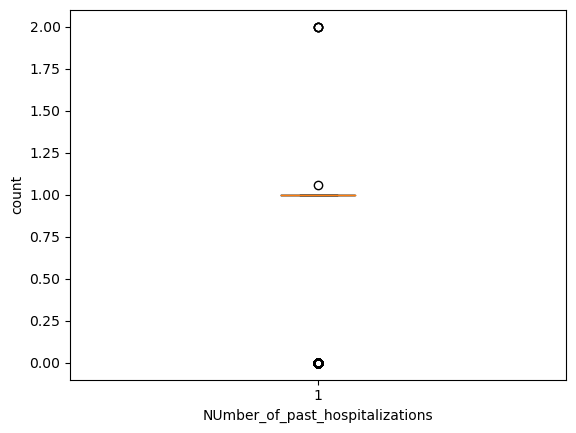

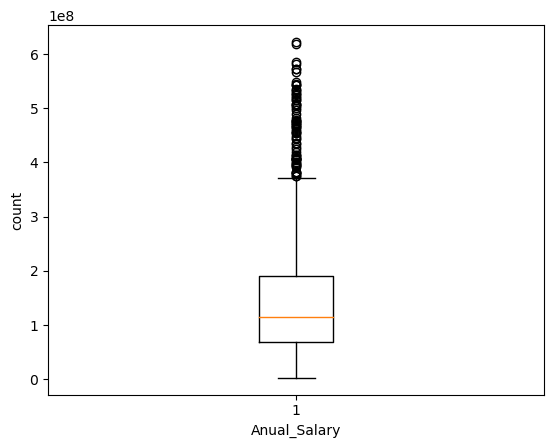

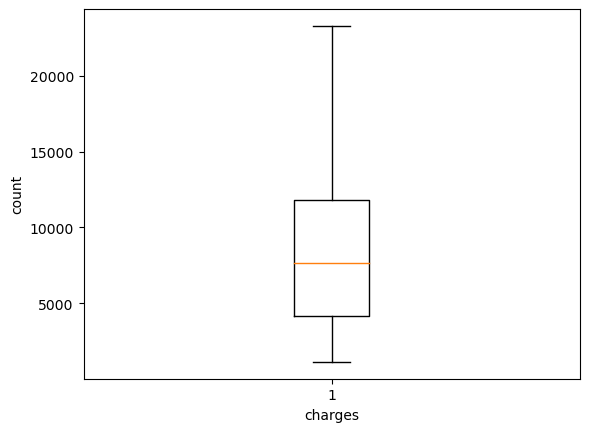

In [18]:
for col_name in col:
    if (df[col_name].dtypes!='object'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [19]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,43.0,female,26.700,2.0,yes,18777.25866,28.0,1006237.0,1.472207e+07,1.0,5.715081e+08,southwest,22478.60000
1109,47.0,female,27.830,0.0,yes,42788.03588,15.0,1007168.0,1.578218e+07,2.0,6.173644e+08,southeast,23065.42070
1111,25.0,male,24.985,2.0,no,62860.68914,9.0,999973.0,1.772978e+07,2.0,5.436506e+08,northeast,23241.47453
1113,28.0,female,24.320,1.0,no,42171.46225,26.0,1012087.0,1.306414e+07,2.0,5.847415e+08,northeast,23288.92840


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
for col_name in col:
    if (df[col_name].dtypes=='object'):
        df[col_name]=le.fit_transform(df[col_name])

In [23]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,43.0,0,26.700,2.0,1,18777.25866,28.0,1006237.0,1.472207e+07,1.0,5.715081e+08,3,22478.60000
1109,47.0,0,27.830,0.0,1,42788.03588,15.0,1007168.0,1.578218e+07,2.0,6.173644e+08,2,23065.42070
1111,25.0,1,24.985,2.0,0,62860.68914,9.0,999973.0,1.772978e+07,2.0,5.436506e+08,0,23241.47453
1113,28.0,0,24.320,1.0,0,42171.46225,26.0,1012087.0,1.306414e+07,2.0,5.847415e+08,0,23288.92840


In [24]:
#vif-variance inflation factor
 
from statsmodels.stats.outliers_influence import variance_inflation_factor
    


In [25]:
col_list=[]

In [26]:
for col in df.columns:
    if ((df[col].dtypes!='object')&(col!='charges')):
        col_list.append(col)

In [27]:
col_list

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region']

In [28]:
x=df[col_list]

In [29]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1106,43.0,0,26.700,2.0,1,18777.25866,28.0,1006237.0,1.472207e+07,1.0,5.715081e+08,3
1109,47.0,0,27.830,0.0,1,42788.03588,15.0,1007168.0,1.578218e+07,2.0,6.173644e+08,2
1111,25.0,1,24.985,2.0,0,62860.68914,9.0,999973.0,1.772978e+07,2.0,5.436506e+08,0
1113,28.0,0,24.320,1.0,0,42171.46225,26.0,1012087.0,1.306414e+07,2.0,5.847415e+08,0


In [30]:
vif_data=pd.DataFrame()

In [31]:
vif_data['feature']=x.columns

In [32]:
vif_data

,feature
0,age
1,sex
2,bmi
3,children
4,smoker
5,Claim_Amount
6,past_consultations
7,num_of_steps
8,Hospital_expenditure
9,NUmber_of_past_hospitalizations


In [33]:
vif_data['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [34]:
vif_data

,feature,VIF values
0,age,17.737029
1,sex,1.970471
2,bmi,30.045982
3,children,2.053303
4,smoker,2.531142
5,Claim_Amount,5.806431
6,past_consultations,6.624651
7,num_of_steps,70.288749
8,Hospital_expenditure,6.164601
9,NUmber_of_past_hospitalizations,12.745609


In [35]:
x=x.drop(['num_of_steps'], axis=1)

In [36]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.210,0.0,0,29087.54313,17.0,4.720921e+06,0.0,5.578497e+07,2
1,18.0,1,30.140,0.0,0,39053.67437,7.0,4.329832e+06,0.0,1.370089e+07,2
2,18.0,1,33.330,0.0,0,39023.62759,19.0,6.884861e+06,0.0,7.352311e+07,2
3,18.0,1,33.660,0.0,0,28185.39332,11.0,4.274774e+06,0.0,7.581968e+07,2
4,18.0,1,34.100,0.0,0,14697.85941,16.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...,...
1106,43.0,0,26.700,2.0,1,18777.25866,28.0,1.472207e+07,1.0,5.715081e+08,3
1109,47.0,0,27.830,0.0,1,42788.03588,15.0,1.578218e+07,2.0,6.173644e+08,2
1111,25.0,1,24.985,2.0,0,62860.68914,9.0,1.772978e+07,2.0,5.436506e+08,0
1113,28.0,0,24.320,1.0,0,42171.46225,26.0,1.306414e+07,2.0,5.847415e+08,0


In [37]:
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,age,15.521968
1,sex,1.937875
2,bmi,14.374969
3,children,2.027543
4,smoker,2.379511
5,Claim_Amount,5.427066
6,past_consultations,6.307146
7,Hospital_expenditure,5.945109
8,NUmber_of_past_hospitalizations,11.409121
9,Anual_Salary,7.103403


In [38]:
x=x.drop(['age'], axis=1)

In [39]:
x

,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,1,23.210,0.0,0,29087.54313,17.0,4.720921e+06,0.0,5.578497e+07,2
1,1,30.140,0.0,0,39053.67437,7.0,4.329832e+06,0.0,1.370089e+07,2
2,1,33.330,0.0,0,39023.62759,19.0,6.884861e+06,0.0,7.352311e+07,2
3,1,33.660,0.0,0,28185.39332,11.0,4.274774e+06,0.0,7.581968e+07,2
4,1,34.100,0.0,0,14697.85941,16.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...
1106,0,26.700,2.0,1,18777.25866,28.0,1.472207e+07,1.0,5.715081e+08,3
1109,0,27.830,0.0,1,42788.03588,15.0,1.578218e+07,2.0,6.173644e+08,2
1111,1,24.985,2.0,0,62860.68914,9.0,1.772978e+07,2.0,5.436506e+08,0
1113,0,24.320,1.0,0,42171.46225,26.0,1.306414e+07,2.0,5.847415e+08,0


In [40]:
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,sex,1.925092
1,bmi,13.177166
2,children,1.978483
3,smoker,1.951105
4,Claim_Amount,5.374954
5,past_consultations,6.257966
6,Hospital_expenditure,5.944946
7,NUmber_of_past_hospitalizations,8.517698
8,Anual_Salary,6.168366
9,region,2.892816


In [41]:
x=x.drop(['bmi'], axis=1)

In [42]:
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,sex,1.831471
1,children,1.978259
2,smoker,1.800594
3,Claim_Amount,4.820511
4,past_consultations,5.626400
5,Hospital_expenditure,5.602999
6,NUmber_of_past_hospitalizations,7.412285
7,Anual_Salary,6.163122
8,region,2.546708


In [43]:
x=x.drop(['NUmber_of_past_hospitalizations'], axis=1)

In [44]:
x

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
0,1,0.0,0,29087.54313,17.0,4.720921e+06,5.578497e+07,2
1,1,0.0,0,39053.67437,7.0,4.329832e+06,1.370089e+07,2
2,1,0.0,0,39023.62759,19.0,6.884861e+06,7.352311e+07,2
3,1,0.0,0,28185.39332,11.0,4.274774e+06,7.581968e+07,2
4,1,0.0,0,14697.85941,16.0,3.787294e+06,2.301232e+07,2
...,...,...,...,...,...,...,...,...
1106,0,2.0,1,18777.25866,28.0,1.472207e+07,5.715081e+08,3
1109,0,0.0,1,42788.03588,15.0,1.578218e+07,6.173644e+08,2
1111,1,2.0,0,62860.68914,9.0,1.772978e+07,5.436506e+08,0
1113,0,1.0,0,42171.46225,26.0,1.306414e+07,5.847415e+08,0


In [45]:
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,sex,1.829794
1,children,1.739868
2,smoker,1.729722
3,Claim_Amount,4.364317
4,past_consultations,5.271294
5,Hospital_expenditure,5.444988
6,Anual_Salary,5.743563
7,region,2.522320


In [46]:
x

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
0,1,0.0,0,29087.54313,17.0,4.720921e+06,5.578497e+07,2
1,1,0.0,0,39053.67437,7.0,4.329832e+06,1.370089e+07,2
2,1,0.0,0,39023.62759,19.0,6.884861e+06,7.352311e+07,2
3,1,0.0,0,28185.39332,11.0,4.274774e+06,7.581968e+07,2
4,1,0.0,0,14697.85941,16.0,3.787294e+06,2.301232e+07,2
...,...,...,...,...,...,...,...,...
1106,0,2.0,1,18777.25866,28.0,1.472207e+07,5.715081e+08,3
1109,0,0.0,1,42788.03588,15.0,1.578218e+07,6.173644e+08,2
1111,1,2.0,0,62860.68914,9.0,1.772978e+07,5.436506e+08,0
1113,0,1.0,0,42171.46225,26.0,1.306414e+07,5.847415e+08,0


In [47]:
y=df['charges']

In [48]:
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1106    22478.60000
1109    23065.42070
1111    23241.47453
1113    23288.92840
1114    23306.54700
Name: charges, Length: 1095, dtype: float64

In [49]:
#x-independent,y-dependent

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.7,random_state=2)

In [50]:
x_train

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
557,0,1.0,0,43176.571140,5.0,2.649410e+06,1.137310e+08,1
678,1,0.0,0,32447.736310,23.0,6.243166e+06,1.221640e+08,2
652,1,0.0,0,14289.594510,6.0,5.854792e+06,9.947616e+07,2
379,0,0.0,0,48448.722110,18.0,1.053152e+06,1.128126e+08,1
320,0,1.0,0,4414.416523,9.0,1.444796e+06,2.527777e+07,2
...,...,...,...,...,...,...,...,...
364,1,5.0,0,52472.541650,11.0,3.130505e+06,3.143569e+07,3
471,0,0.0,0,12929.429980,13.0,4.475731e+05,5.840026e+07,1
302,1,2.0,0,27908.758260,13.0,4.719800e+06,6.134519e+07,1
498,1,1.0,0,20560.754740,16.0,9.956115e+06,6.447189e+07,1


In [51]:
x_test

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
666,1,2.0,0,30580.674140,11.0,2.848439e+06,1.730071e+08,2
92,0,0.0,0,36547.280070,19.0,6.174561e+06,9.794991e+07,3
790,1,3.0,0,33244.656410,24.0,2.777013e+06,1.776015e+08,1
68,1,0.0,0,26717.249650,7.0,1.080715e+06,3.150786e+06,1
296,0,0.0,0,16081.646280,10.0,8.748337e+04,9.833337e+07,1
...,...,...,...,...,...,...,...,...
669,1,1.0,0,23003.851150,23.0,9.884223e+06,1.743057e+08,2
771,1,0.0,0,19345.401590,8.0,6.472783e+06,1.819213e+08,2
839,1,2.0,0,40086.758300,22.0,4.013910e+06,1.613619e+08,2
177,0,2.0,0,5496.365185,7.0,4.728537e+06,5.833210e+07,2


In [52]:
from sklearn.linear_model import LinearRegression

lin_model=LinearRegression()

In [53]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [54]:
mod_pred=lin_model.predict(x_test)

In [55]:
mod_pred

array([ 9515.12433963,  6438.06477242, 10664.12780225,  1644.0507048 ,
        5687.38115626,  7333.2591425 ,  2545.64248442,  9706.79063902,
        5851.6334634 , 28344.65085737,  7240.65786303, 20621.75173689,
        7953.91669234,  3407.50027766,  5774.49908528,  6633.65306068,
        7832.39413086,  4947.7579472 ,  5530.47041395,  8474.48826871,
        6511.04917882,  4278.70596899, 15619.83866044,  6072.06723131,
       24559.11969119,  7283.24830613,  4002.31254336,  8947.15988624,
        6746.52135107,  8276.01903538,  5504.22102035,  7090.2010516 ,
        8206.39348014, 11823.10669586,  7602.70332191,  7990.07409552,
        5509.23837715,  5634.07618181, 21992.67042127, 10092.24181141,
        3290.96103615,  5925.62847416,  5743.08422684,  6556.96367215,
       10051.25563896,  7999.46577974,  7984.27279443,  4764.93136502,
       11362.03537448,  3171.21374112,  6917.64468123, 10002.57620778,
       10143.73673974,  5282.32579855,  5214.57984293, 20315.23394808,
      

In [56]:
y_test

666     9304.70190
92      2007.94500
790    11289.10925
68      1769.53165
296     4357.04365
          ...     
669     9386.16130
771    10982.50130
839    11884.04858
177     2801.25880
807    11482.63485
Name: charges, Length: 329, dtype: float64

In [57]:
#accuracy technique

from sklearn.metrics import *
mse=mean_squared_error(mod_pred,y_test)


In [58]:
r2_score(mod_pred,y_test)

0.816111371451448

In [59]:
mse

4560609.289962444

In [60]:
import numpy as np

In [61]:
rmse=np.sqrt(mse)

In [62]:
rmse

2135.5583087245464

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='charges'>

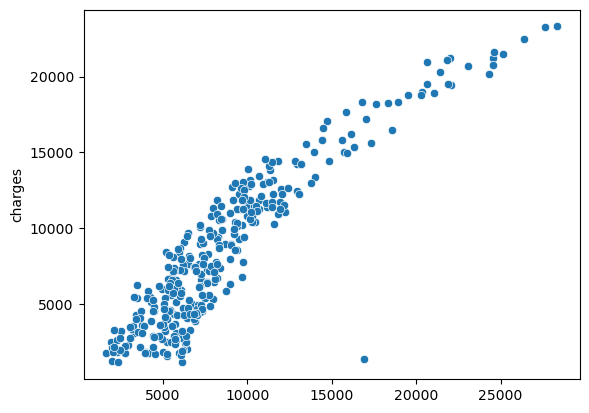

In [63]:
sns.scatterplot(mod_pred, y_test)